In [57]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt

# Plots LaTeX-Style
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

In [58]:
T = 1
h = 0.1
n = int(T/h) + 1

A = np.array([[0, 1], [-1, 0]])
Ak = np.array([[1, h], [-h, 1]])
Ck = np.array([[1, 0],[0, 1]]) # z = (x, y)
x0 = np.array([1, 1])

x_var = 0.1
z_var = 0.1
Q = np.array([[x_var, 0], [0, x_var]])
R =np.array([[z_var, 0], [0, z_var]])

In [59]:
x_real = np.zeros((n, 2))
x_real[0] = x0
for i in range(1, n):
    x_real[i] = x_real[i-1] + h * np.dot(A, x_real[i-1])

x_pred = np.zeros((n, 2))
Cov_pred = np.zeros((n, 2, 2))

x_pred[0] = x0
Cov_pred[0] = Q
#Cov_pred[0] = np.zeros((2,2))

x_filt = np.zeros((n, 2))
Cov_filt = np.zeros((n, 2, 2))

x_filt[0] = x0
Cov_filt[0] = Q
#Cov_filt[0] = np.zeros((2,2))

z = np.zeros((n, 2))
z[0] = np.dot(Ck, x0) + np.random.normal(0, z_var, size=(1,2))

In [60]:
print(Cov_filt[0])

for i in range(1, n):
    x_pred[i] = np.dot(Ak, x_pred[i-1]) #+ np.random.normal(0, x_var, size=(1,2))
    Cov_pred[i] = np.dot(np.dot(Ak, Cov_pred[i-1]), Ak.T) + Q

    z[i] = np.dot(Ck, x_real[i]) + np.random.normal(0, z_var, size=(1,2))

    K = np.dot(np.dot(Cov_pred[i], Ck.T), np.linalg.inv(np.dot(np.dot(Ck, Cov_pred[i]), Ck.T) + R))
    x_filt[i] = x_pred[i] + np.dot(K, (z[i] - np.dot(Ck, x_pred[i])))
    Cov_filt[i] = Cov_pred[i] - np.dot(np.dot(K, Ck), Cov_pred[i])

    print(Cov_filt[i])

[[0.1 0. ]
 [0.  0.1]]
[[ 6.67774086e-02  0.00000000e+00]
 [-9.19048651e-20  6.67774086e-02]]
[[ 7.51867199e-02  0.00000000e+00]
 [-5.94699861e-20  7.51867199e-02]]
[[8.02387202e-02 0.00000000e+00]
 [1.14912738e-20 8.02387202e-02]]
[[8.36092578e-02 0.00000000e+00]
 [2.32709274e-20 8.36092578e-02]]
[[ 8.60179265e-02  0.00000000e+00]
 [-5.31655595e-20  8.60179265e-02]]
[[8.78249746e-02 0.00000000e+00]
 [3.00505585e-20 8.78249746e-02]]
[[8.92307185e-02 0.00000000e+00]
 [4.64410304e-20 8.92307185e-02]]
[[ 9.03554287e-02  0.00000000e+00]
 [-3.46695921e-20  9.03554287e-02]]
[[9.12756809e-02 0.00000000e+00]
 [1.84577335e-20 9.12756809e-02]]
[[ 9.20425467e-02  0.00000000e+00]
 [-1.59504368e-20  9.20425467e-02]]


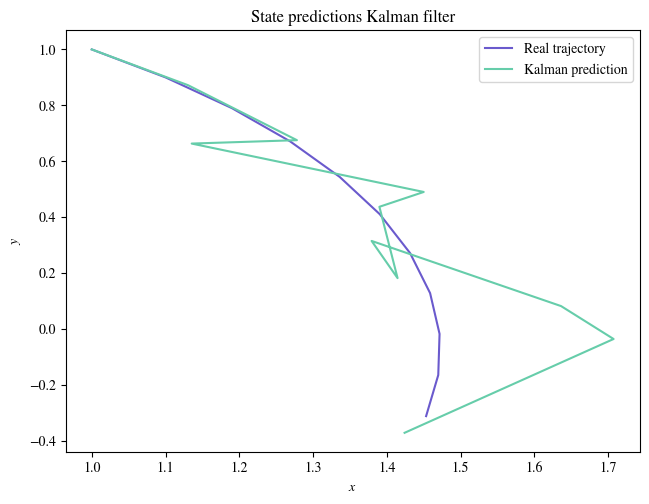

In [61]:
fig, ax = plt.subplots()
fig.tight_layout()

ax.plot(x_real[:,0], x_real[:,1], label='Real trajectory', color='slateblue')
ax.plot(x_filt[:,0], x_filt[:,1], label='Kalman prediction', color='mediumaquamarine')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('State predictions Kalman filter')
ax.legend()
plt.savefig('HW3_2_Kalman.png', dpi=300)
plt.show()